<a href="https://colab.research.google.com/github/bkrant/DS-Unit-2-Sprint-2-Regression/blob/master/module1-ols-regression/linear-regression-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [61]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price','id','date'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 18) (4323, 18) (17290,) (4323,)


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train[['sqft_living']] , y_train)
print('rMSE train:', mean_squared_error(y_true=y_train, y_pred=model.predict(X_train[['sqft_living']]))**.5)
print('R-Squared train:', r2_score(y_train, model.predict(X_train[['sqft_living']])) )
print('rMSE test:', mean_squared_error(y_true=y_test, y_pred=model.predict(X_test[['sqft_living']]))**.5)
print('R-Squared test:', r2_score(y_test, model.predict(X_test[['sqft_living']])) )


rMSE train: 257525.43133546622
R-Squared train: 0.49238383875829517
rMSE test: 276559.1746114674
R-Squared test: 0.49406905389089006


In [0]:
import seaborn as sns

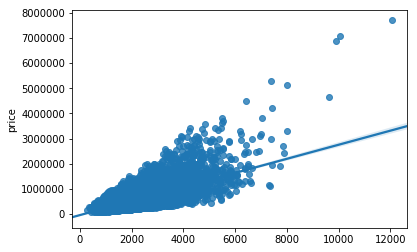

In [73]:
sns.regplot(X_train[['sqft_living']] , y_train);

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

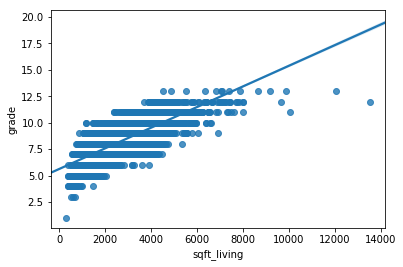

In [88]:
sns.regplot(df.sqft_living, df.grade);

In [83]:
model2 = LinearRegression()
model2.fit(X_train[['sqft_living','grade']] , y_train)
print('rMSE train:',mean_squared_error(y_true=y_train, y_pred=model2.predict(X_train[['sqft_living','grade']]))**.5)
print('R-Squared train:', r2_score(y_train, model2.predict(X_train[['sqft_living','grade']])) )
print('rMSE test:',mean_squared_error(y_true=y_test, y_pred=model2.predict(X_test[['sqft_living','grade']]))**.5)
print('R-Squared test:', r2_score(y_test, model2.predict(X_test[['sqft_living','grade']])) )

rMSE train: 246923.1311463963
R-Squared train: 0.5333204773935544
rMSE test: 264262.2149524917
R-Squared test: 0.5380603453464137


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [84]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
print('rMSE train:',mean_squared_error(y_true=y_train, y_pred=model2.predict(X_train))**.5)
print('R-Squared train:', r2_score(y_train, model2.predict(X_train)) )
print('rMSE test:',mean_squared_error(y_true=y_test, y_pred=model2.predict(X_test))**.5)
print('R-Squared test:', r2_score(y_test, model2.predict(X_test)) )

rMSE train: 198272.2430201279
R-Squared train: 0.699102185448748
rMSE test: 212539.51663817815
R-Squared test: 0.7011904448878395


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
